# Exploratory Data Analysis (EDA) on Terrorism(1970 to 2017)
  ## By <a class="social-icon" href="https://www.linkedin.com/in/chitransh-tarsoliya-33639b172/" target="_blank">Chitransh Tarsoliya </a>
  
<a class="social-icon" href="https://github.com/i-am-creator/deeplearning/" target="_blank">github</a>




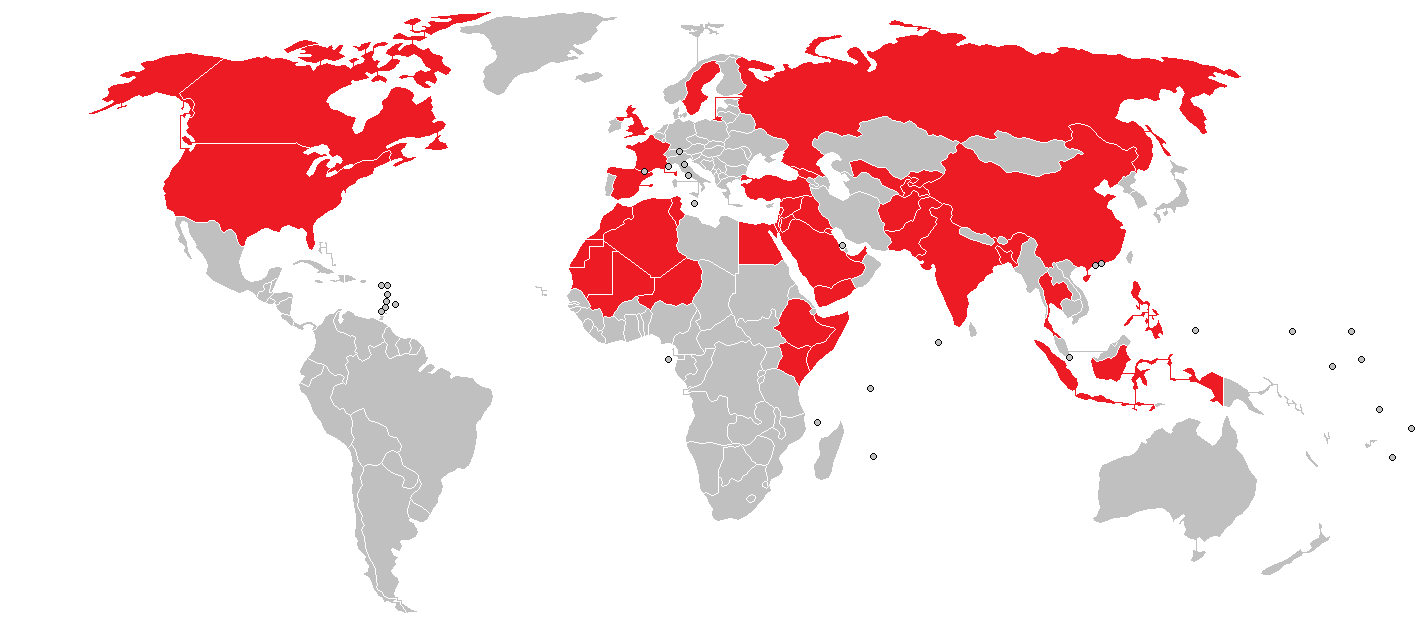


# **Table of contents**


**Loading and cleaning**
--
==============================================================

-  import
-  load data
-  frist look
-  filter out important features
-  Basic info about features and Null value count & persantage
-  Removing nan values


**Analysis**
--
==============================================================
- country wise total terror incident
  - top 10 country
- AttackType vs country
- Analyse according to region
    - Total terror attacks and killed
    - AttackType vs Region
    - Year wise terror attacks 
    - Year wise terror killed 
- Year wise total terror incident
- Year wise terror attacks in Top 10 country 
- 15 Most active group
- Attacking Methods by Terrorists
- Attacking Targets by Terrorists
- success vs fail

**Terrorism in India**
--
==============================================================

- animation 
- Most atacked cityies
- Attacking Methods by Terrorists
- Attacking Targets by Terrorists
- 15 Most active group
- Activity of most active groups 


# **Loading and cleaning**

## Imports

In [ ]:
!pip install chart_studio

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import io
import base64
from IPython.display import HTML, display
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import os
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.express as px


## Load data

In [ ]:
!gdown --id 1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_
!unzip -o /content/'Global Terrorism - START data.zip'
csv_file = 'globalterrorismdb_0718dist.csv'

# df=pd.read_csv(csv_file,low_memory=False)
df=pd.read_csv(csv_file, encoding='ISO-8859-1' ,low_memory=False)


##  Frist look

In [ ]:
df.head()


In [ ]:
df.shape

##  Filter out important features

The data has 135 attributes and it is difficult enough to keep all of them for analytical purposes. So, I created a second dataset with metadata of the original one with information about null data, categorical entries, numerical entries and feature importance of each attribute.

In [ ]:
!gdown --id 1ND96P9ZLnAF72-qEkzazyvTgk4iz6GOv

metadata = pd.read_csv('./global_terrorism_metadata_us.csv', sep=';', index_col='attribute')
metadata.head(10)


In [ ]:
metadata.importance.unique()


In [ ]:
s = 0
for imp in metadata.importance.unique()[:-1]:
    k = len(metadata.query(f'importance == "{imp}"'))
    print(f"no of {imp} colmuns\t :{k}")
    s+=k
print(f"no of nan colmuns\t :{len(metadata)-s}")

In [ ]:
high_importance = metadata.query('importance == "high"')
medium_importance = metadata.query('importance == "medium"')


In [ ]:
high_importance

In [ ]:
medium_importance

In [ ]:
df = df.loc[:, list(high_importance.index)  + list(medium_importance.index)]
df.head()

## Basic info about features and Null value count & persantage

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
print(list(df.keys()))

In [ ]:
df.isnull().sum()

In [ ]:
def missingdata(data):
    # this function calculates %age of null values 
    
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sn.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

missingdata(df)

## Removing nan values

### droping feature with more thn 20% null values

In [ ]:
Null_count = df.isnull().sum()
Nulll_moreThn80 = Null_count[Null_count>len(df)*.2].keys()  # keys of features with more thn 20% Null values
Nulll_moreThn80

In [ ]:
df.drop(columns=Nulll_moreThn80, inplace = True)


In [ ]:
missingdata(df)

### try to fill null values


In [ ]:
# df[['nwound']].plot.kde(bw_method=0.3)
ax = df.hist(column='nwound' )

In [ ]:
# df[["nkill"]]
ax = df.hist(column='nkill' )

In [ ]:
df[["longitude"]].plot.kde(bw_method=0.3)


In [ ]:
df.natlty1_txt.unique()

In [ ]:
# df[["target1"]]
df.target1.unique(), len(df.target1.unique())

form above histogram column seems useless so we are droping it.

In [ ]:
# df.
df[["ishostkid"]].plot.kde(bw_method=0.3)


In [ ]:
ax = df.hist(column='specificity' )
df[["specificity"]]

In [ ]:
df.fillna({'latitude':0.0,}, inplace = True)


In [ ]:
df["nwound"].fillna(df["nwound"].mean(), inplace = True)
df["nkill"].fillna(df["nkill"].mean(), inplace = True)
df["longitude"].fillna(df["longitude"].mean(), inplace = True)


In [ ]:
df = df.fillna({'natlty1_txt':'None',})

In [ ]:
df.fillna({'target1':'Other',}, inplace = True)
df.fillna({'city':'unknown',}, inplace = True)


In [ ]:
df.provstate
df.fillna({'provstate':'unknown',}, inplace = True)


In [ ]:
df["ishostkid"].fillna(df["ishostkid"].mean(), inplace = True)

In [ ]:
df.dropna(inplace = True)


In [ ]:
df.isnull().sum().sum()

# **Analysis**




## country wise total terror incident

In [ ]:
#@title CODE
trace =go.Bar(x=df.country_txt.value_counts().index, y=df.country_txt.value_counts().values, name='country')
layout = go.Layout(title="country")

fig = go.Figure(data=[trace],layout=layout)
# iplot(fig)
HTML(fig.to_html())

### top 10 country


In [ ]:
## top 10 country
#@title CODE

upto = 10
top_10_country = df.country_txt.value_counts().index[:upto]
trace =go.Bar(x=df.country_txt.value_counts().index[:upto], y=df.country_txt.value_counts().values[:upto], name='country')
layout = go.Layout(title="country")

fig = go.Figure(data=[trace],layout=layout)
HTML(fig.to_html())


## AttackType vs country

In [ ]:
#@title CODE

d = df.copy()
d=d[['country_txt','attacktype1_txt']]
d =pd.get_dummies(data=d, columns=['attacktype1_txt'], prefix = '', prefix_sep='')

d = d.groupby('country_txt').sum()
d.sort_values("Bombing/Explosion", ascending = False,  inplace = True)
d=d[:upto].T
# d.reset_index(inplace=True)
fig = go.Figure()
for entry in range(len(d)):
  e = d.iloc[entry]
  fig.add_trace(go.Bar(
    x=e.index,
    y=e.values,
    name=str(e.name),
    # marker_color='indianred'
  ))


fig.update_layout(barmode='stack')
# # d
fig.update_layout(title='AttackType vs country',
                   xaxis_title='Country',
                   yaxis_title='Count')
# fig = px.bar(d, x="country_txt", y=d.columns[1:], title="AttackType vs country")
HTML(fig.to_html())

## Analyse according to region

In [ ]:
#@title CODE

trace =go.Bar(x=df.region_txt.value_counts().index, y=df.region_txt.value_counts().values, name='attack')
trace_killed =go.Bar(x=df.groupby('region_txt').nkill.sum().index, y=df.groupby('region_txt').nkill.sum().values, name='killed')

fig = go.Figure(data=[trace, trace_killed],layout=layout)
fig.update_layout(title='Region wise terror attacks and killed',
                   xaxis_title='Region',
                   yaxis_title='count')
HTML(fig.to_html())

In [ ]:
#@title CODE
d = df.copy()
d=d[['region_txt','attacktype1_txt']]
d =pd.get_dummies(data=d, columns=['attacktype1_txt'], prefix = '', prefix_sep='')

d = d.groupby('region_txt').sum()
d.sort_values("Bombing/Explosion", ascending = False,  inplace = True)
d=d.T
fig = go.Figure()
for entry in range(len(d)):
  e = d.iloc[entry]
  fig.add_trace(go.Bar(
    x=e.index,
    y=e.values,
    name=str(e.name),
    # marker_color='indianred'
  ))


fig.update_layout(barmode='stack')
# # d
fig.update_layout(title='AttackType vs Region',
                   xaxis_title='Region',
                   yaxis_title='Count')
# fig = px.bar(d, x="country_txt", y=d.columns[1:], title="AttackType vs country")
HTML(fig.to_html())

In [ ]:
#@title CODE
fig = go.Figure()

for r in df.region_txt.unique():
    
    data = df[df.region_txt == r]
    data = data.groupby('iyear').grouper.size()

    #     fig = go.Figure(data=go.Scatter(x=data.index, y=data.values))
    fig.add_trace(go.Scatter(x=data.index, y=data.values,
                        mode='lines+markers',
                        name=r))
fig.update_layout(title='Year wise terror attacks in Region',
                   xaxis_title='Year',
                   yaxis_title='Region')

HTML(fig.to_html())

In [ ]:
#@title CODE
fig = go.Figure()

for r in df.region_txt.unique():
    
    data = df[df.region_txt == r]
    data = data.groupby('iyear').nkill.sum()

    #     fig = go.Figure(data=go.Scatter(x=data.index, y=data.values))
    fig.add_trace(go.Scatter(x=data.index, y=data.values,
                        mode='lines+markers',
                        name=r))

fig.update_layout(title='Year wise No of killed people in Region',
                   xaxis_title='Year',
                   yaxis_title='Region')

HTML(fig.to_html())

## Year wise terror attacks in Top 10 country 

In [ ]:
#@title CODE
fig = go.Figure()

for c in top_10_country:
    
    data = df[df.country_txt == c]
    data = data.groupby('iyear').grouper.size()

    #     fig = go.Figure(data=go.Scatter(x=data.index, y=data.values))
    fig.add_trace(go.Scatter(x=data.index, y=data.values,
                        mode='lines+markers',
                        name=c))

fig.update_layout(title='Year wise terror attacks in Top 10 country',
                   xaxis_title='Year',
                   yaxis_title='Count')
HTML(fig.to_html())

## 15 Most active group

In [ ]:
#@title CODE

d = df.gname.value_counts()
d.drop(index='Unknown',inplace = True)

d = d[:15]
trace =go.Bar(x=d.index, y=d.values, name='country')
layout = go.Layout(title="15 Most active group")

fig = go.Figure(data=[trace],layout=layout)
# iplot(fig)
HTML(fig.to_html())

## Year wise total terror incident

In [ ]:
#@title CODE
data = df.groupby('iyear').grouper.size()
data2 = df.groupby('iyear').nkill.sum()
# data = data.value_counts()

# fig = px.line(data, x="index", y="value", title='Life expectancy in Canada')
# fig.show()
fig = go.Figure()

fig = fig.add_trace(go.Scatter(x=data.index, y=data.values, mode='lines+markers', name='total incident'))
fig = fig.add_trace(go.Scatter(x=data2.index, y=data2.values, mode='lines+markers',
                        name='total killed'))

fig.update_layout(title='Number Of Terrorist Activities Each Year',
                   xaxis_title='Year',
                   yaxis_title='Count')
HTML(fig.to_html())

## Attacking Methods by Terrorists

In [ ]:
#@title CODE
trace =go.Pie(labels=df.attacktype1_txt.value_counts().index, values=df.attacktype1_txt.value_counts().values, name='method')
layout = go.Layout(title='Attacking Methods by Terrorists')

fig = go.Figure(data=[trace],layout=layout)
HTML(fig.to_html())


## Attacking Targets by Terrorists

In [ ]:
#@title CODE
# targtype1_txt
trace =go.Pie(labels=df.targtype1_txt.value_counts().index, values=df.targtype1_txt.value_counts().values, name='targtype1_txt')
layout = go.Layout(title='Attacking Targets by Terrorists ')

fig = go.Figure(data=[trace],layout=layout)
HTML(fig.to_html())

## success vs fail

In [ ]:
#@title CODE
# targtype1_txt
trace =go.Pie(labels=['success', 'fail'], values=df.success.value_counts().values, name='success')
layout = go.Layout(title='success vs fail')

fig = go.Figure(data=[trace],layout=layout)
HTML(fig.to_html())

# **Terrorism in India**

In [ ]:
india_df = df[df.country_txt == 'India']

## Animation

In [ ]:
#@title CODE

!gdown --id 1n7w1cQ73l_vLCO9ynZzivIQKjhl2GG6O

filename = 'india.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
from IPython.display import clear_output
clear_output()
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


## Most atacked cityies in India

In [ ]:
#@title CODE
d = india_df.copy()
d=d[['city','attacktype1_txt']]
d =pd.get_dummies(data=d, columns=['attacktype1_txt'], prefix = '', prefix_sep='')

d = d.groupby('city').sum()
d.sort_values("Bombing/Explosion", ascending = False,  inplace = True)
d.drop(index='Unknown',inplace = True)

d = d[:15]
d=d.T
fig = go.Figure()
for entry in range(len(d)):
  e = d.iloc[entry]
  fig.add_trace(go.Bar(
    x=e.index,
    y=e.values,
    name=str(e.name),
    # marker_color='indianred'
  ))


fig.update_layout(barmode='stack')
# # d
fig.update_layout(title='AttackType vs indian Citys',
                   xaxis_title='indian Citys',
                   yaxis_title='Count')
# fig = px.bar(d, x="country_txt", y=d.columns[1:], title="AttackType vs country")
HTML(fig.to_html())

## Attacking Methods by Terrorists

In [ ]:
#@title CODE
trace =go.Pie(labels=india_df.attacktype1_txt.value_counts().index, values=india_df.attacktype1_txt.value_counts().values, name='method')
layout = go.Layout(title='Attacking Methods by Terrorists in india')
fig = go.Figure(data=[trace],layout=layout)
HTML(fig.to_html())

## Attacking Targets by Terrorists

In [ ]:
#@title CODE
# targtype1_txt

trace =go.Pie(labels=india_df.targtype1_txt.value_counts().index, values=india_df.targtype1_txt.value_counts().values, name='targtype1_txt')
layout = go.Layout(title='Attacking Targets by Terrorists in india')

fig = go.Figure(data=[trace],layout=layout)
HTML(fig.to_html())

## 15 Most active group

In [ ]:
#@title CODE

d = india_df.gname.value_counts()
d.drop(index='Unknown',inplace = True)

d = d[:15]

active_gname = d.index
trace =go.Bar(x=d.index, y=d.values, name='15 Most active group in india')
layout = go.Layout(title="15 Most active group in india")

fig = go.Figure(data=[trace],layout=layout)
# iplot(fig)
HTML(fig.to_html())

## Activity of most active groups


In [ ]:
#@title CODE


fig = go.Figure()

for r in active_gname:
    
    data = india_df[india_df.gname == r]
    data = data.groupby('iyear').grouper.size()

    #     fig = go.Figure(data=go.Scatter(x=data.index, y=data.values))
    fig.add_trace(go.Scatter(x=data.index, y=data.values,
                        mode='lines+markers',
                        name=r))
fig.update_layout(title='Activity of most active groups in india',
                   xaxis_title='Year',
                   yaxis_title='group name')

HTML(fig.to_html())